In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def preproc(fp):
    
    res = []
    with open(fp, 'r') as file:
        for i in file.readlines():
            res.append(i.strip("\n").split(";"))
    df = pd.DataFrame(res)
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    return df
    

def isolationForest_anomaly(data):    
    # Train Isolation Forest Model
    model = IsolationForest(contamination=0.1)
    model.fit(data)
    
    # Predict anomalies
    anomaly_scores = model.decision_function(data)
    anomalies = np.where(anomaly_scores < 0, 1, 0)
    
    return anomalies

In [8]:
fp="/Users/rohitmishra/AnomalyDetection/data/valve1/0.csv"
df = preproc("/Users/rohitmishra/AnomalyDetection/data/valve1/0.csv")

In [9]:
df

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
1,2020-03-09 10:14:33,0.026587799999999998,0.0401113,1.3302,0.054711,79.3366,26.0199,233.062,32.0,0.0,0.0
2,2020-03-09 10:14:34,0.0261697,0.040452499999999995,1.35399,0.38263800000000003,79.5158,26.0258,236.04,32.0,0.0,0.0
3,2020-03-09 10:14:35,0.026199,0.0394189,1.54006,0.710565,79.3756,26.0265,251.38,32.0,0.0,0.0
4,2020-03-09 10:14:36,0.026026599999999997,0.0396411,1.3345799999999999,0.38263800000000003,79.6097,26.0393,234.392,32.0,0.0,0.0
5,2020-03-09 10:14:37,0.026289999999999997,0.040273199999999995,1.07851,-0.27321599999999996,79.6109,26.041999999999998,225.342,32.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1144,2020-03-09 10:34:28,0.0267892,0.040617099999999996,1.46938,0.054711,75.6738,25.8363,253.533,32.0,0.0,0.0
1145,2020-03-09 10:34:29,0.0274043,0.0414741,1.18285,-0.27321599999999996,75.6865,25.8336,205.67700000000002,32.0,0.0,0.0
1146,2020-03-09 10:34:30,0.026980900000000002,0.0394095,1.1963,0.054711,75.6305,25.8358,208.907,32.0,0.0,0.0
1147,2020-03-09 10:34:31,0.0272452,0.0403909,1.30745,0.054711,75.7601,25.8363,243.298,32.9986,0.0,0.0


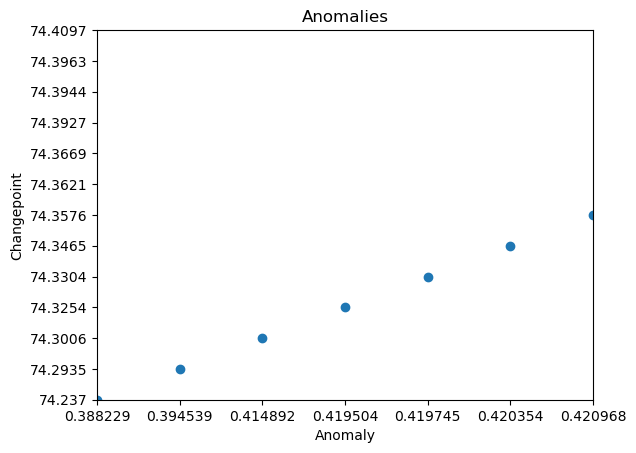

In [15]:
# create scatterplot
plt.scatter(sorted(df["Current"]),sorted(df["Temperature"]))

# add title and labels
plt.title("Anomalies")
plt.xlabel("Anomaly")
plt.ylabel("Changepoint")
plt.xlim(0, 6)
plt.ylim(0, 12)
# display plot
plt.show()